<a href="https://colab.research.google.com/github/rosacarla/treinamento-e-teste-de-RNT/blob/main/Treinamento_RNT_test_s22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO DE REDE NEURAL TEMPORAL - RNT - TESTE
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS  
> PROFESSOR:  LUCAS EMANUEL SILVA E OLIVEIRA  
> AUTORA: CARLA EDILA SILVEIRA  
> <p align='justify'>OBJETIVO: treinar a rede RNT com modelo treinado (S8_RNT_treinada.h5) para fazer previsões sobre uma base de dados de teste relacionada à cotação do dólar (em reais), dentro de determinado período de tempo.<p/>  
> DATA: 20/09/2023</br>
> </br>
<img src='https://i.postimg.cc/MK6W61Gm/real-dolar.png' width=980 height=312>



In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS

from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
#import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# AJUSTAR JANELA DE PREVISÃO (DEVE SER A MESMA UTILIZADA NO TREINAMENTO)

janela_prev = 10

In [ ]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#  CARREGAMENTO E PREPROCESSAMENTO DOS DADOS

# Leitura do arquivo CSV de teste
#train_df = pd.read_csv('/content/gdrive/MyDrive/RN/dolar_treinamento_S8.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/RN/dolar_teste_S8.csv')

# Filtra apenas coluna 'Valor' nos dados de teste
test_data = test_df[['Dolar']].values

# Filtra apenas coluna 'Valor' nos dados de teste
test_data = test_df[['Dolar']].values

# Normaliza dados de treinamento entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
test_data_scaled = scaler.fit_transform(test_data)

In [ ]:
# Visualização do dataframe de teste criado a partir do arquivo 'dolar_teste_S8.csv'

test_df

,Data,Dolar
0,0,3.846057
1,1,3.860572
2,2,3.744606
3,3,3.847145
4,4,3.076075
...,...,...
1090,1090,4.454738
1091,1091,4.576095
1092,1092,4.562124
1093,1093,4.507359


In [ ]:
# PRÉ-PROCESSAMENTO DO CONJUNTO DE DADOS DE ACORDO COM A JANELA DE TEMPO

# Funcao auxiliar para criar conjuntos de dados com base na janela de tempo
def create_dataset(dataset, window_size=1):
    X, Y = [], []
    for i in range(len(dataset) - window_size):
        window = dataset[i:(i + window_size), 0]
        X.append(window)
        Y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(Y)

# Cria conjuntos de teste
X_test, y_test = create_dataset(test_data_scaled, janela_prev)

# Reshape dos dados para formato esperado pela LSTM [amostras, janela de tempo, caracteristicas]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# CRIAÇÃO DO MODELO DA REDE NEURAL TEMPORAL
# Caminho no desktop 'C:/RN/S8_RNT_treinada.h5'

# Carrega modelo treinado
model = load_model('/content/gdrive/MyDrive/RN/S8_RNT_treinada.h5')

In [ ]:
# PREVISÕES DO MODELO COM DADOS DE TESTE

# Fazer previsoes
test_predict = model.predict(X_test)

34/34 [==============================] - 1s 4ms/step


In [ ]:
# PÓS-PROCESSAMENTO DOS DADOS

# Desfaz normalizacao dos dados
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

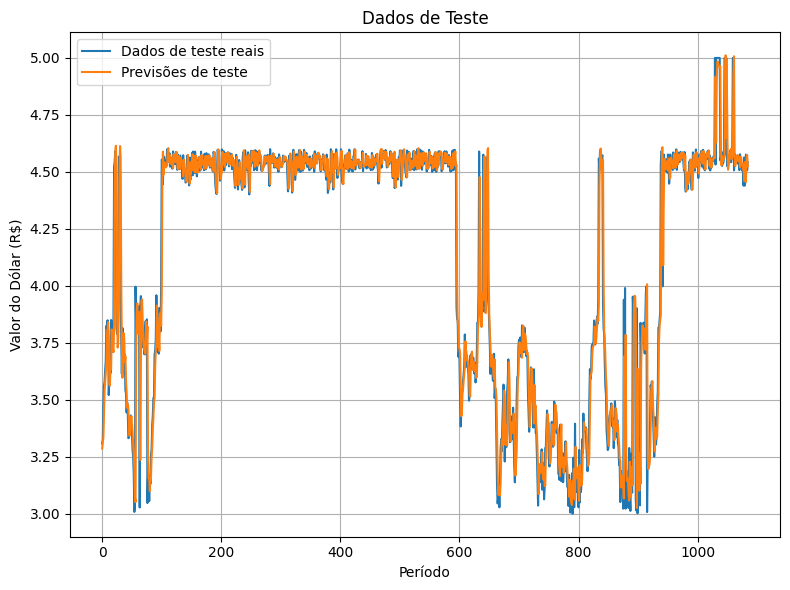

In [ ]:
# APRESENTAÇÃO GRÁFICA DOS RESULTADOS

# Plota resultados em dois graficos separados
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

# Grafico : Dados de treinamento
ax1.plot(y_test[0], label='Dados de teste reais')
ax1.plot(test_predict[:, 0], label='Previsões de teste')
ax1.legend()
ax1.set_title('Dados de Teste')
ax1.set_xlabel('Período')
ax1.set_ylabel('Valor do Dólar (R$)')
ax1.grid(True)

# Ajusta espaçamento entre subplots
plt.tight_layout()

# Exibe grafico
plt.show()

In [ ]:
# APRESENTAÇÃO DAS MÉTRICAS DE DESEMPENHO

mse_test = mean_squared_error(y_test[0], test_predict[:, 0])

print('\n' + '=' * 70)
print("\n Erro Médio Quadrático (MSE) - Teste: {:.4f}".format(mse_test))
print('\n')

mae_test = mean_absolute_error(y_test[0], test_predict[:, 0])

print('=' * 70)
print("\n Erro Médio Absoluto (MAE) - Teste: {:.4f}".format(mae_test))
print('\n')

r2_test = r2_score(y_test[0], test_predict[:, 0])

print('=' * 70)
print("\n Coeficiente de Determinação (R²) - Teste: {:.4f}".format(r2_test))
print('\n' + '=' * 70)



 Erro Médio Quadrático (MSE) - Teste: 0.0217



 Erro Médio Absoluto (MAE) - Teste: 0.0789



 Coeficiente de Determinação (R²) - Teste: 0.9277

